# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 



Downlaod Files:
    
    
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [1]:

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('FlightData_Train.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.shape  #checking the data dimension

(10683, 11)

In [4]:
df.dtypes  #checking the datatypes of each column

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
df.info()  #checking the information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
#checking the null values in each column of the dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

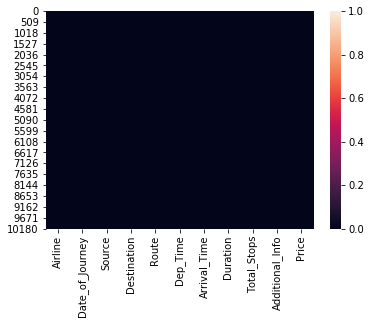

In [8]:
sns.heatmap(df.isnull())

As we can see that there are 1 null value in 'Route' and 'Total_stops'.


In [9]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

In [10]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [11]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Visualization of the data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

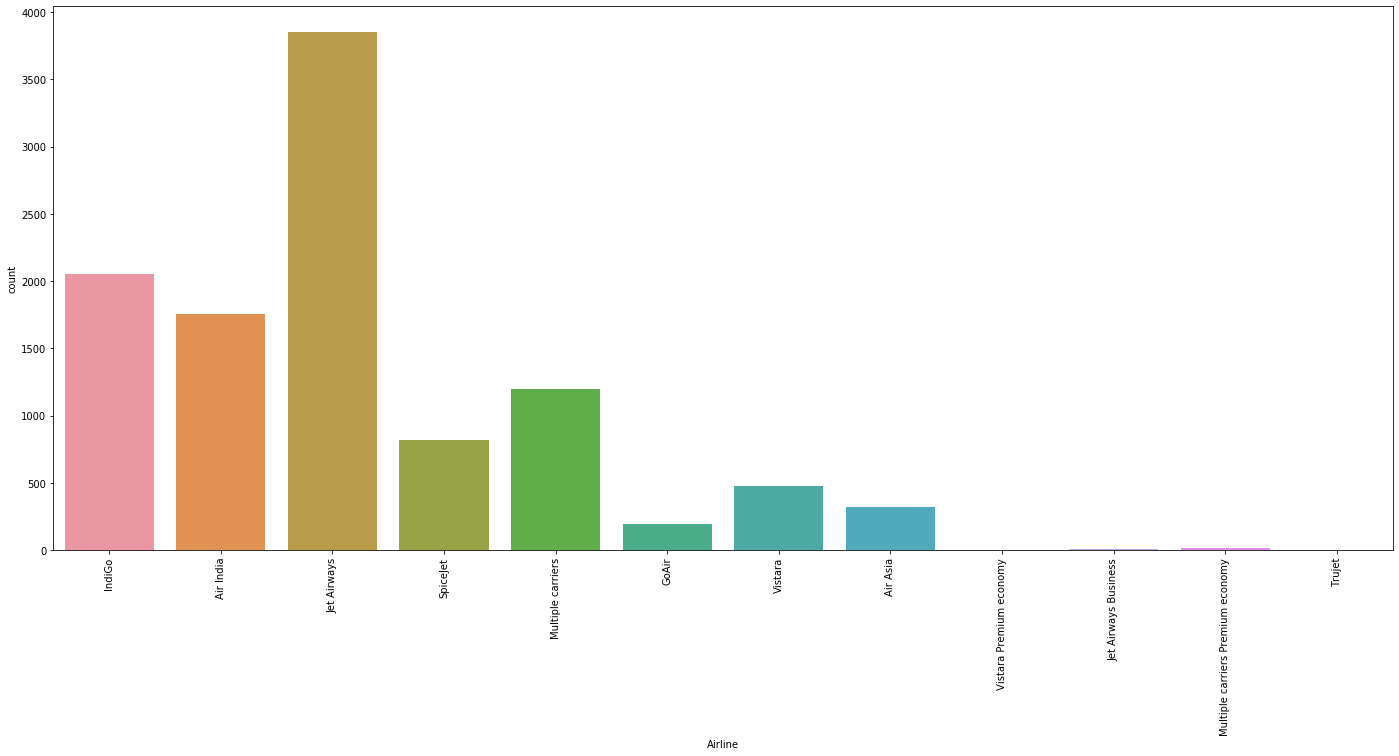

In [12]:
plt.figure(figsize=(24,10))
sns.countplot(df['Airline']) 
plt.xticks(rotation=90)

As we can observe that 'Jet Airways' is used by the passengers mostly.


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

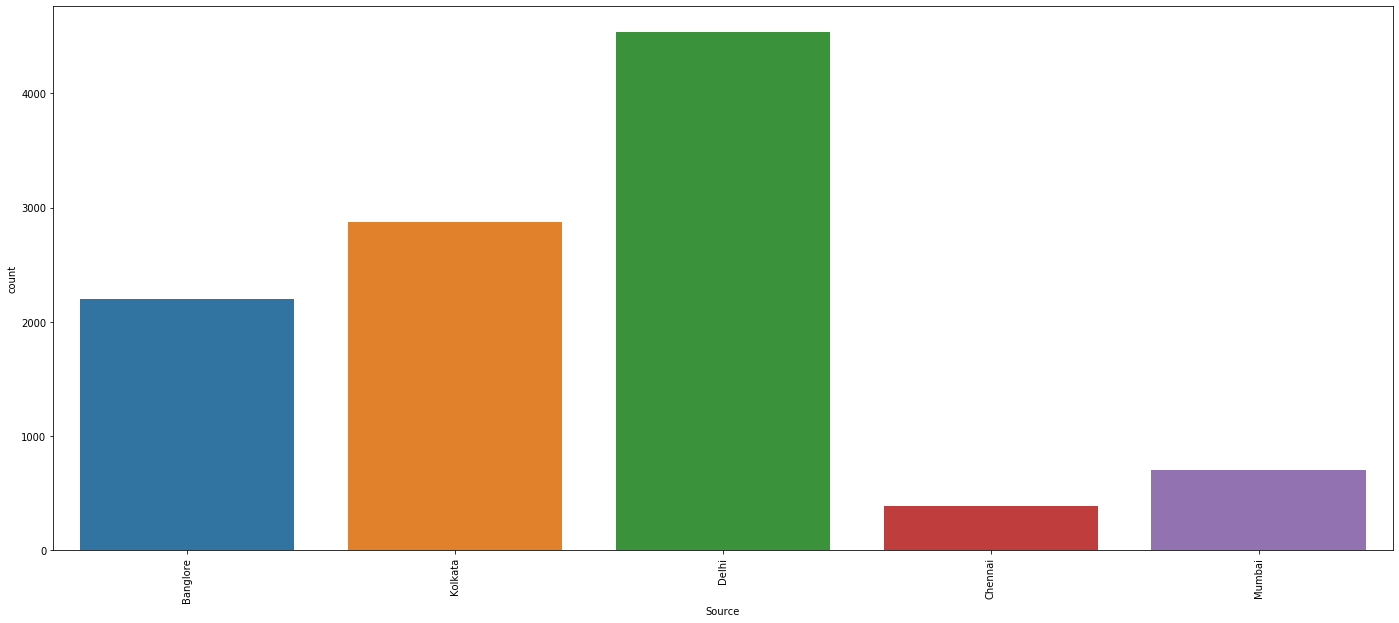

In [13]:
plt.figure(figsize=(24,10))
sns.countplot(df['Source']) 
plt.xticks(rotation=90)

We can observe that majority of the flights have source 'Delhi'.


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

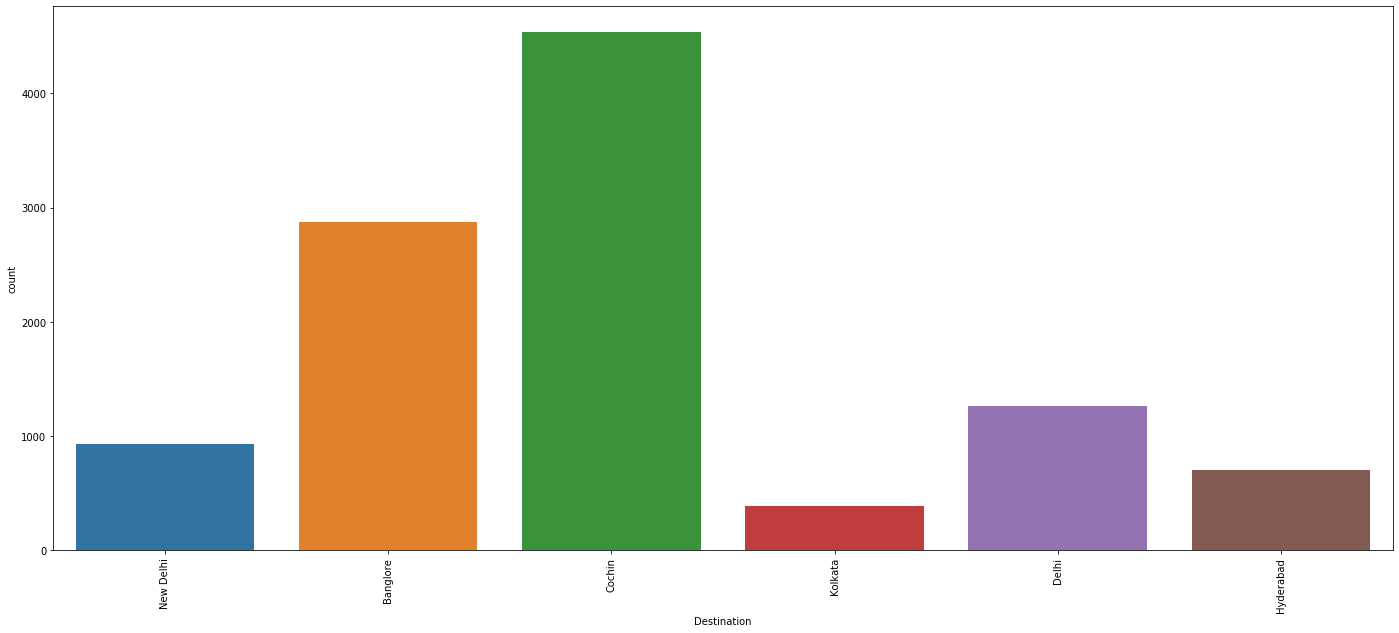

In [14]:
plt.figure(figsize=(24,10))
sns.countplot(df['Destination']) 
plt.xticks(rotation=90)

We can observe that majority of the flights are going to 'cochin'.


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

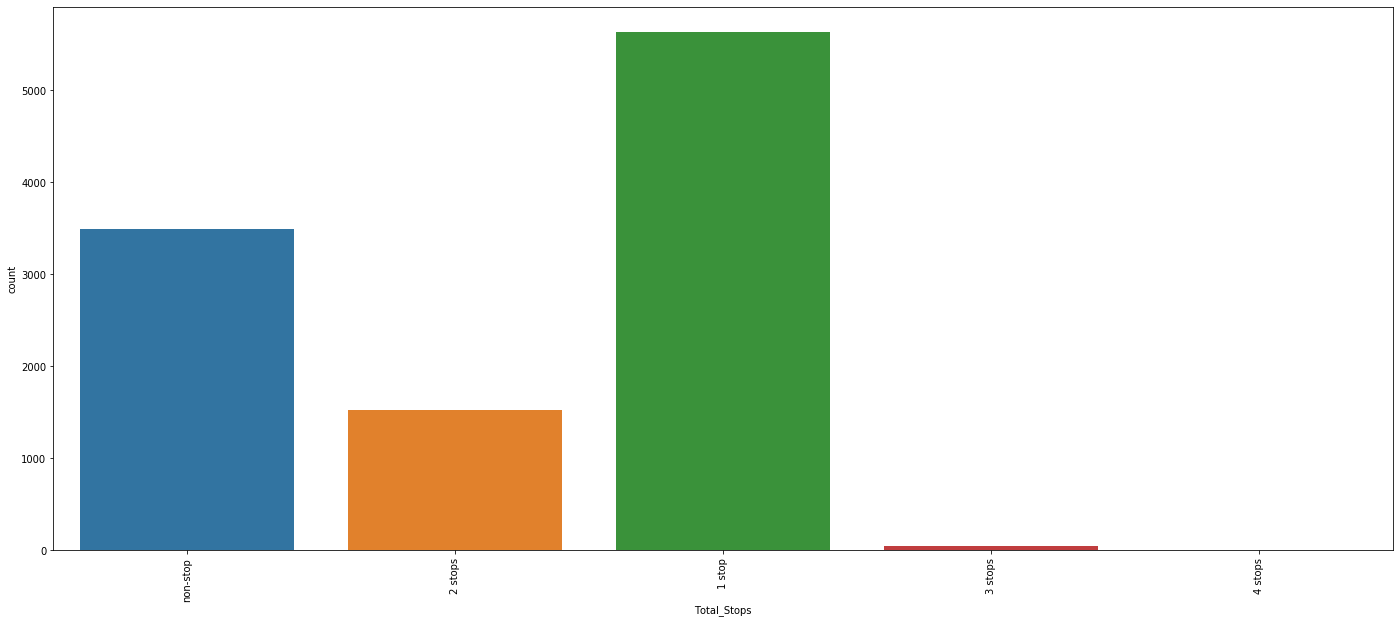

In [15]:
plt.figure(figsize=(24,10))
sns.countplot(df['Total_Stops']) 
plt.xticks(rotation=90)

We can observe from the above graph that majority of the flights have 1 stop in their route.


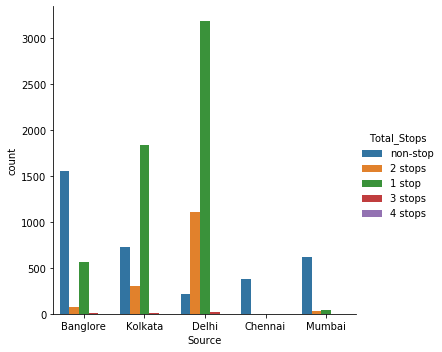

In [16]:
sns.catplot(x ="Source", hue ="Total_Stops",  kind ="count", data = df)

We can observe that from 'Delhi' and 'Kolkata' majority of the flight has 1 stop in their route.

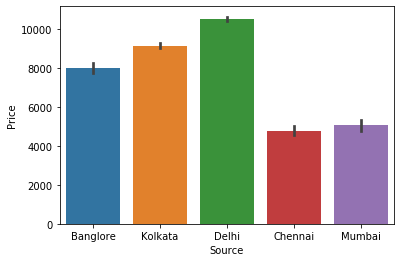

In [17]:
sns.barplot(x='Source', y='Price', data=df)

We can see that from 'Delhi' the highest price flight is taking off.


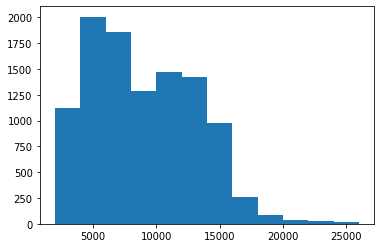

In [18]:
plt.hist(df['Price'], bins=[2000, 4000, 6000, 8000, 10000, 12000,14000,16000,18000,20000,22000,24000,26000])
plt.show()

We can observe from the above graph that majority of the tickets price are range from 3000 to 8000.


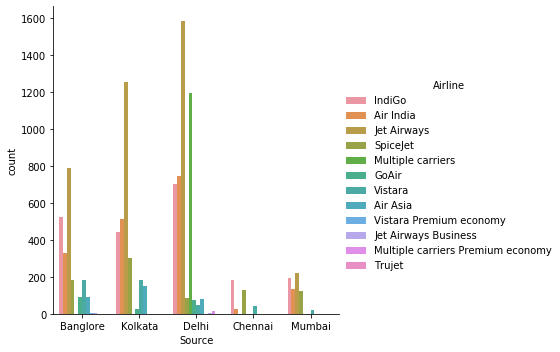

In [19]:
sns.catplot(x ="Source", hue ="Airline",  kind ="count", data = df)

We can observe that from 'Delhi','Kolkata' and 'Banglore', the majority of the flights are of 'Jet Airways'.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

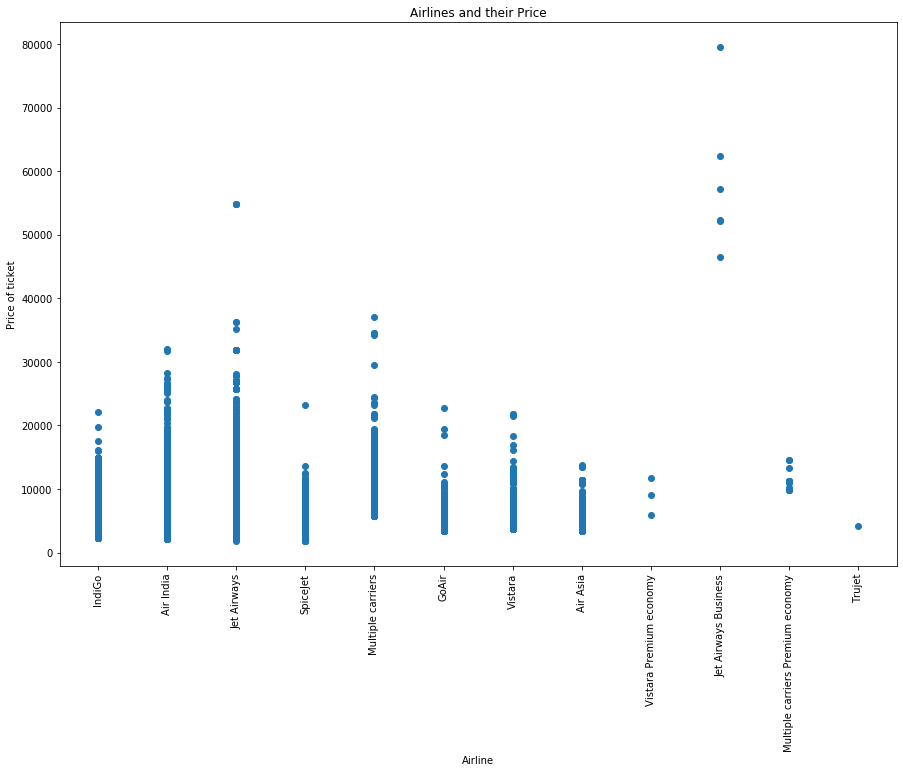

In [20]:
plt.figure(figsize = (15, 10))
plt.title('Airlines and their Price')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

We can observe that 'Jet Airways Business' are having the highest ticket price.


In [21]:
df["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

We can see that there are 2 columns which means same that is 'No info' and 'No Info'. So we can replace the value one column to another.


In [22]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [23]:
df["Additional_Info"].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [24]:
df['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [25]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


In [26]:
df['Date_of_Journey']= pd.to_datetime(df['Date_of_Journey'])

In [27]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


In [28]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                 int64
Additional_Info            object
Price                       int64
dtype: object

In [29]:
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [30]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,0,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,0,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,180,0,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,0,No info,12648


In [31]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [32]:
df["Dep_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [33]:
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [34]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,0,No info,3897,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2,No info,7662,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2,No info,13882,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1,No info,6218,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1,No info,13302,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,22:25,150,0,No info,4107,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,23:20,155,0,No info,4145,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,11:20,180,0,No info,7229,8,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,14:10,160,0,No info,12648,11,30


In [35]:
df["Arrival_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arrival_minute"] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [36]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,150,0,No info,4107,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,155,0,No info,4145,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,180,0,No info,7229,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,160,0,No info,12648,11,30,14,10


In [37]:
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

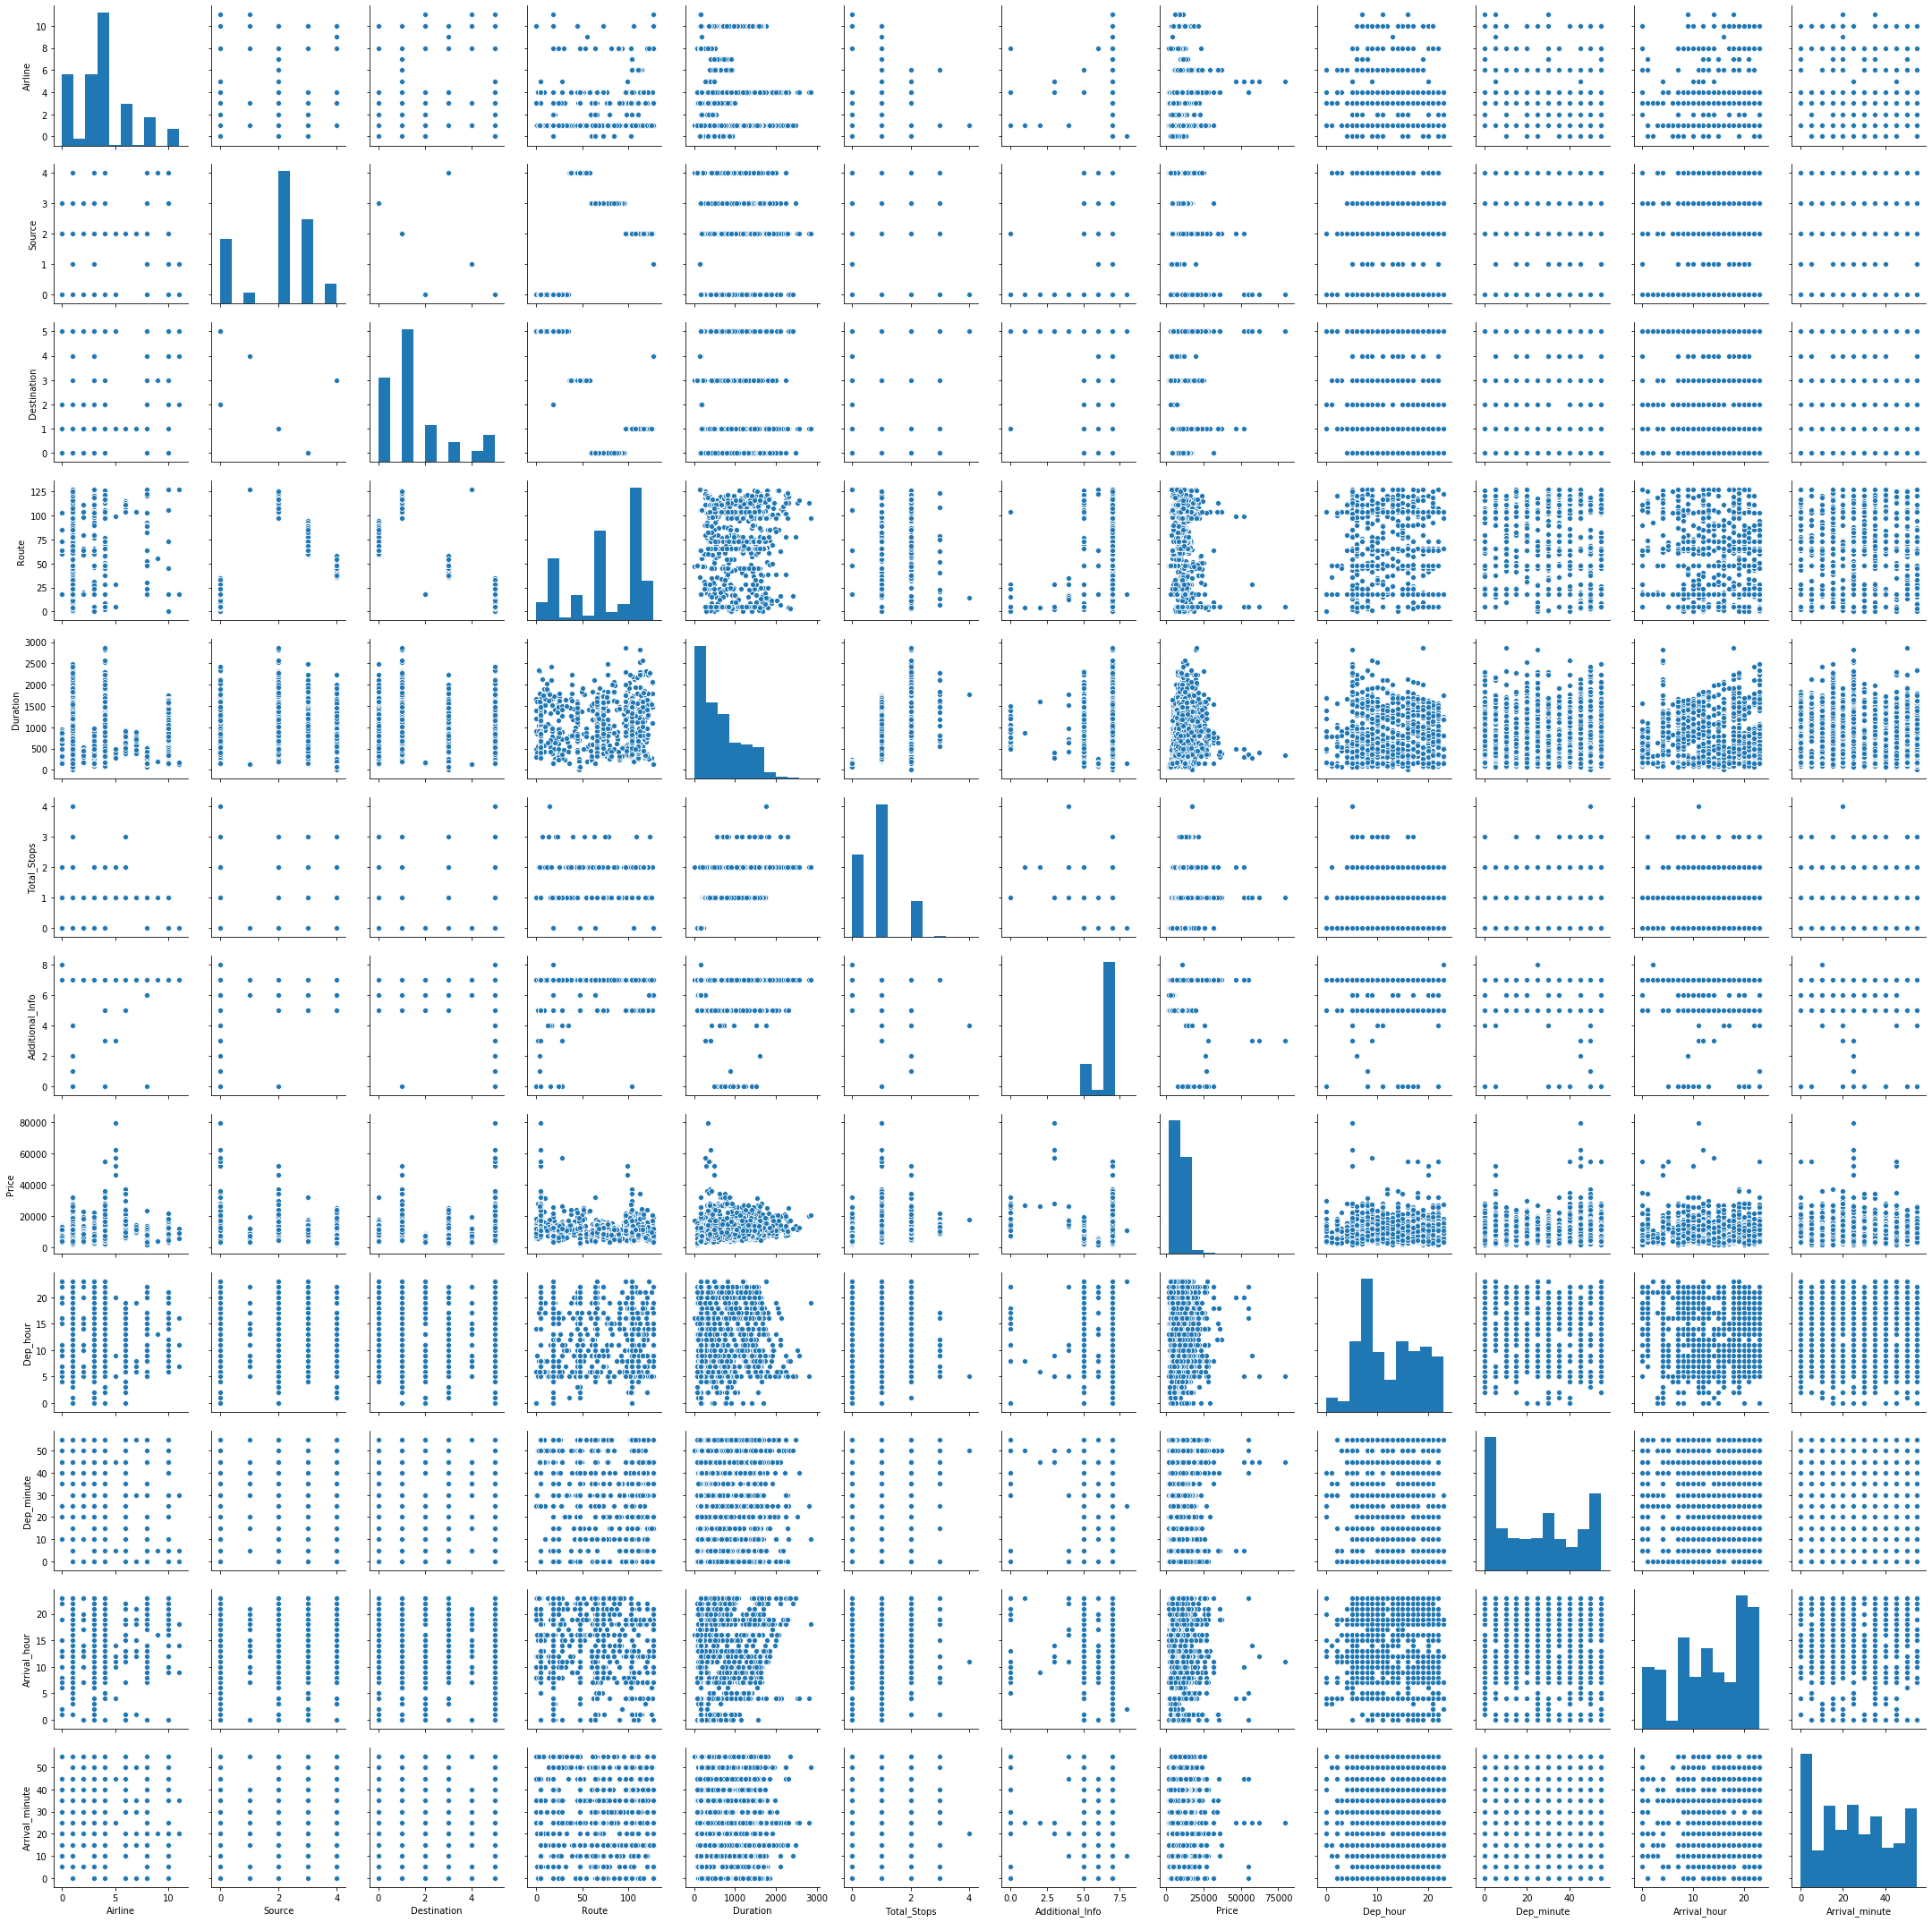

In [38]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B3C7D9B488>,
      dtype=object)

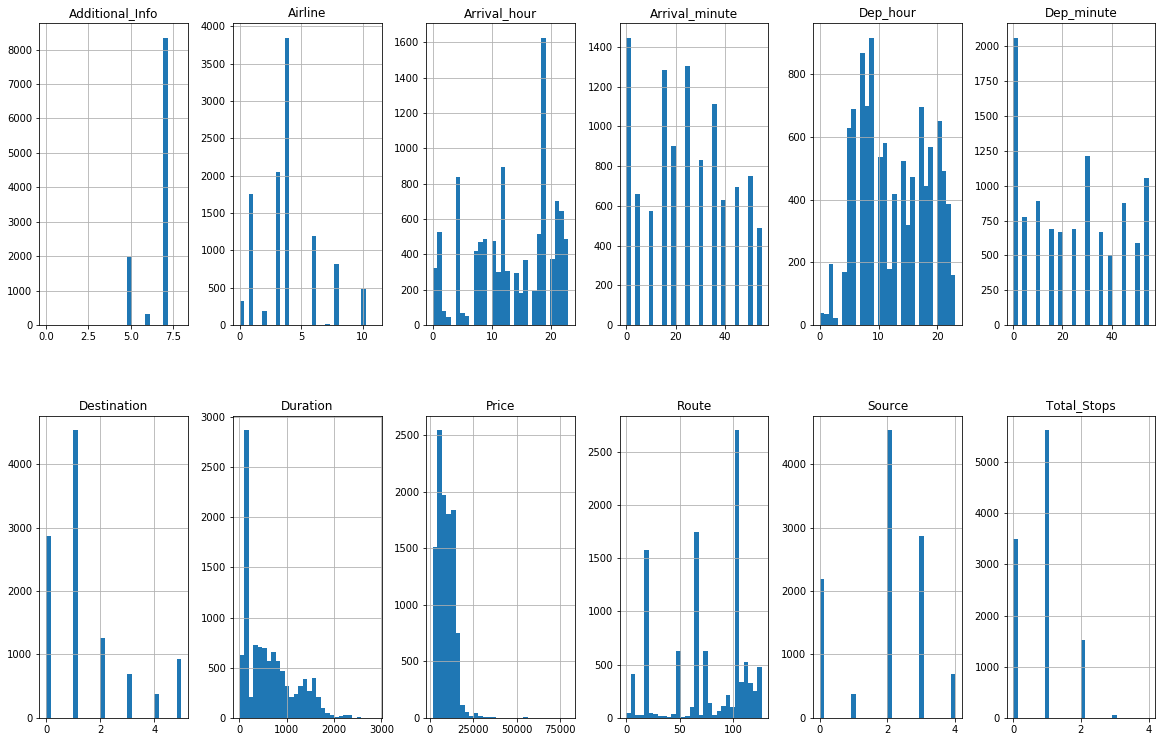

In [39]:
# Histogram to see the data distribution of all the columns'
df.hist(figsize=(20,20), grid = True, layout = (3,6), bins = 30)

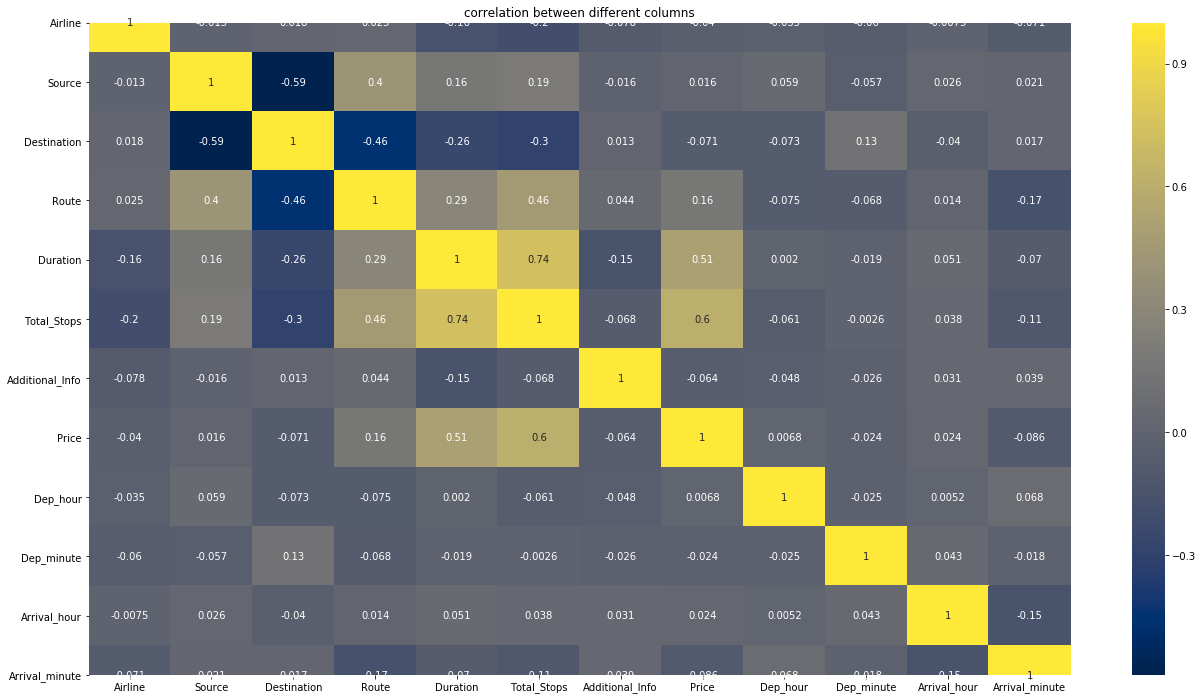

In [40]:
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

From the above heatmap we can observe that 'Total_Stops' and 'Duration' column is most positively related to the price.


In [41]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

We can drop 'Date_of_journey' as it is of no use because every time we predict the price with the model, we put new date as date cannot be repeat.


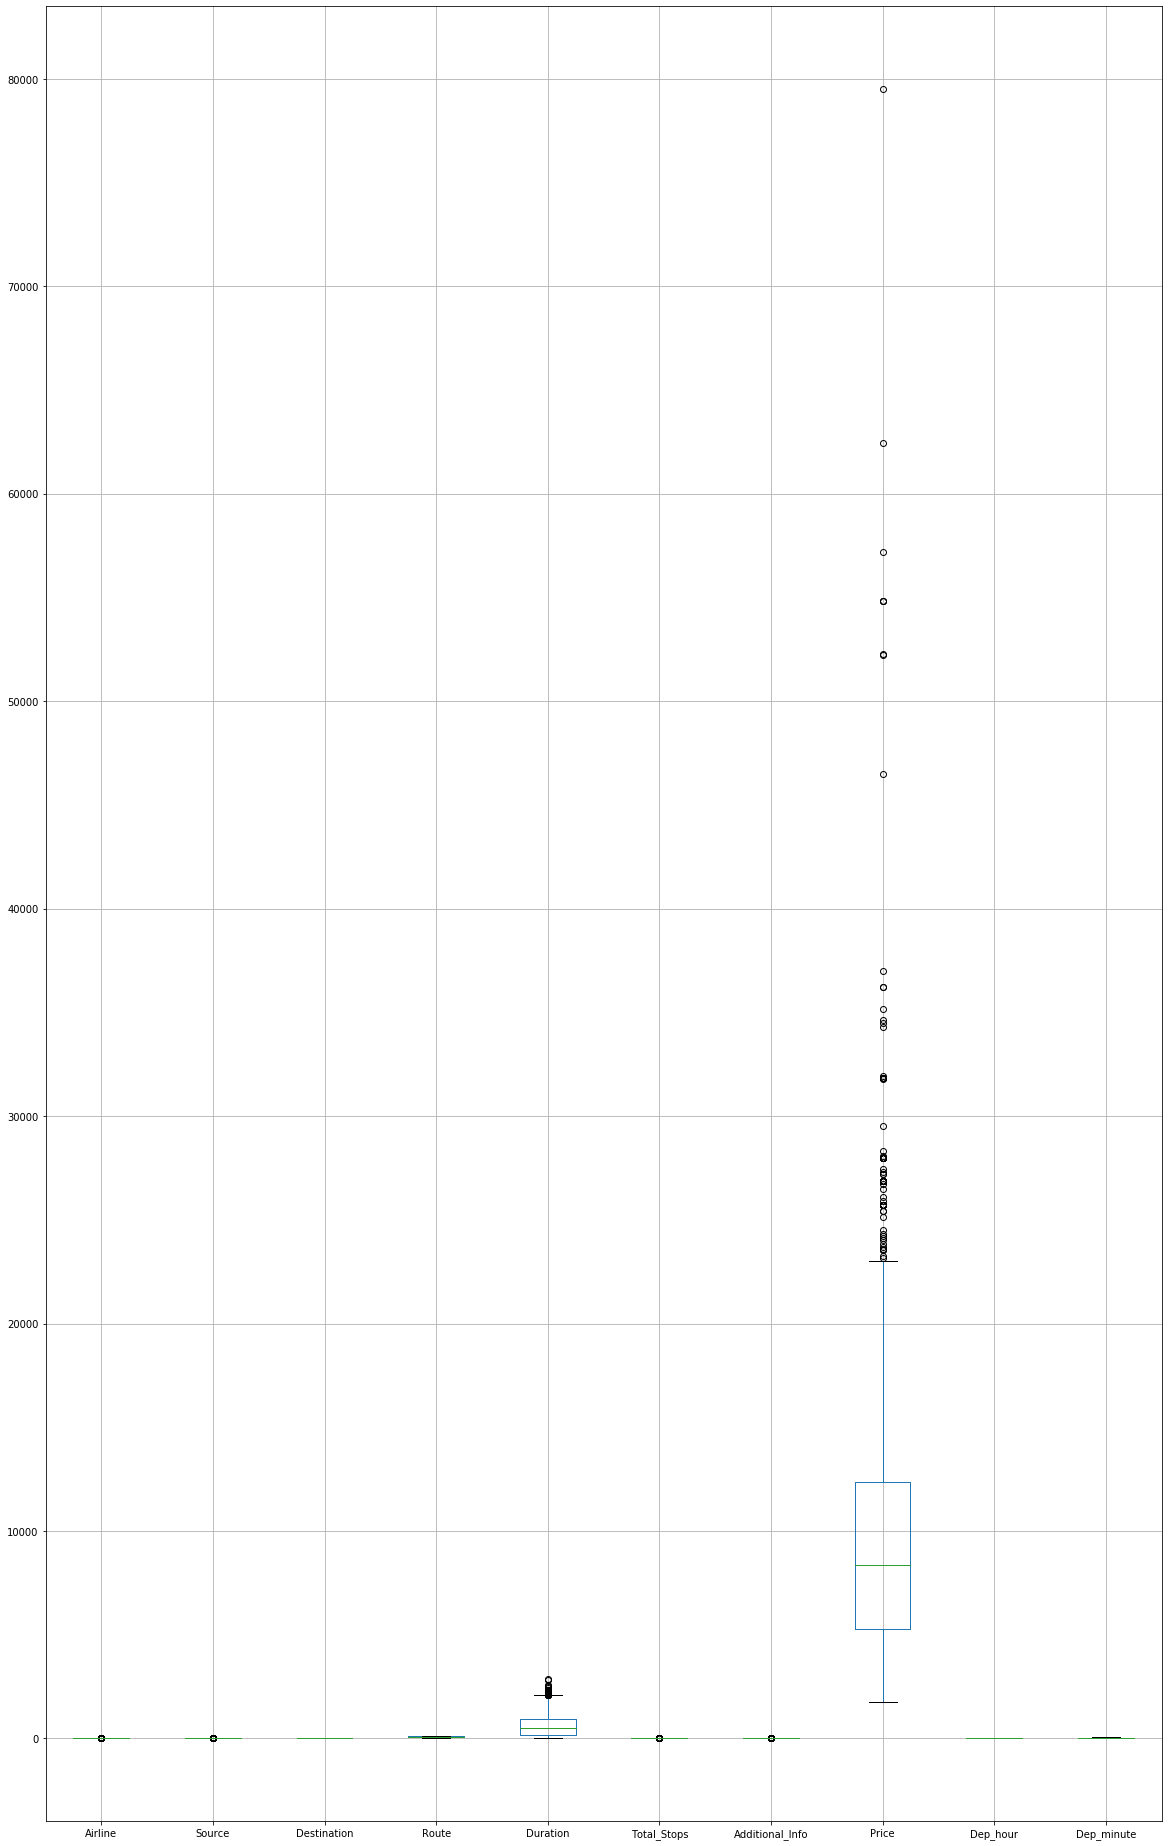

In [42]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,40])
plt.subplots_adjust(bottom=0.25)
plt.show()

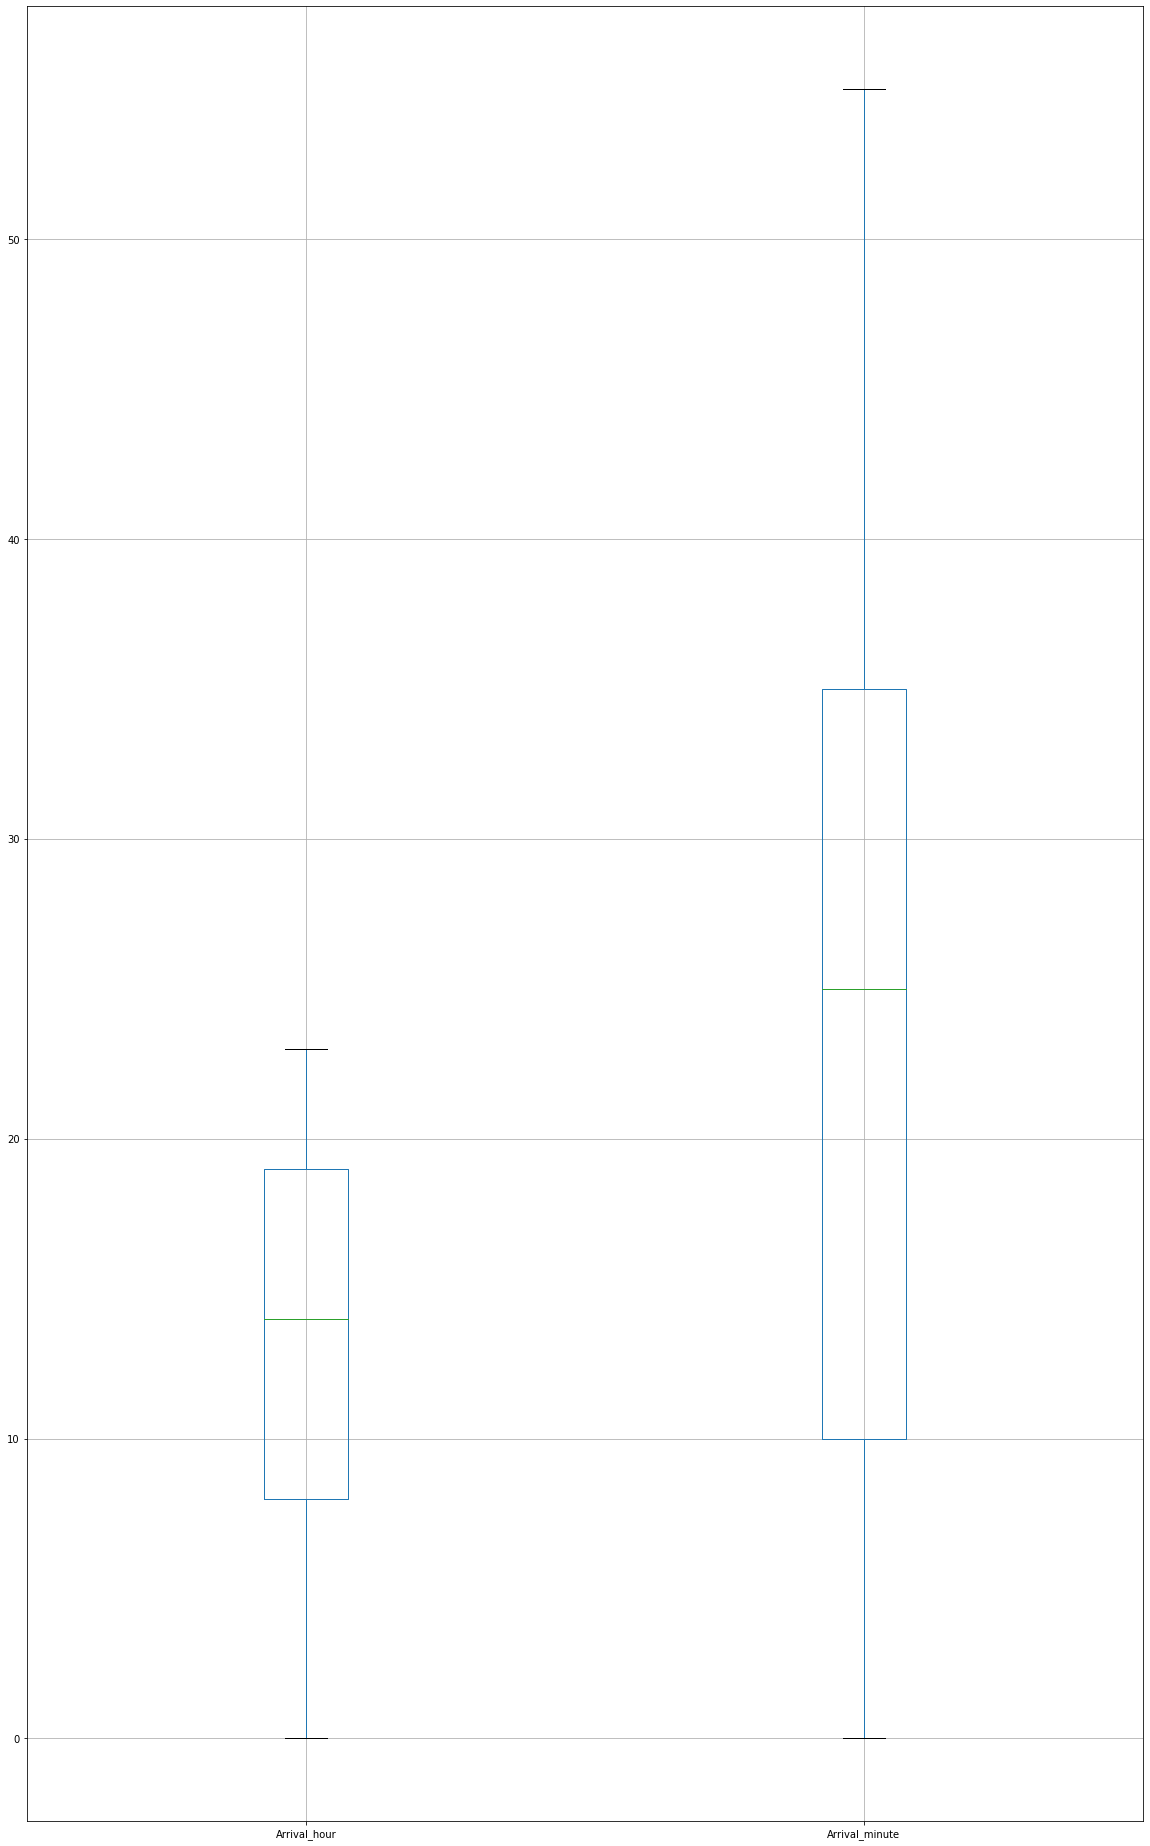

In [43]:
#checking the outliers
df.iloc[:,10:14].boxplot(figsize=[20,40])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [44]:
#checking the zscore of the dataset to remove the outliers
z=np.abs(zscore(df))
z

array([[0.41067545, 1.65844074, 2.41666505, ..., 0.23505036, 1.80042732,
        0.8900573 ],
       [1.26099927, 0.89005213, 0.97382594, ..., 1.36349161, 0.0508512 ,
        0.58712363],
       [0.01448647, 0.04055451, 0.29572775, ..., 0.0313733 , 1.36303329,
        0.01874372],
       ...,
       [0.01448647, 1.65844074, 0.38237045, ..., 0.23505036, 0.34244722,
        0.28418995],
       [2.56545795, 1.65844074, 2.41666505, ..., 0.29779696, 0.09494681,
        0.8900573 ],
       [1.26099927, 0.04055451, 0.29572775, ..., 1.62991527, 0.82393686,
        0.58712363]])

In [45]:
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   785,   826,   919,   936,   946,   959,   966,
         969,   975,  1043,  1067,  1113,  1196,  1218,  1246,  1341,
        1346,  1424,  1442,  1466,  1478,  1496,  1551,  1629,  1654,
        1657,  1665,  1712,  1785,  1791,  1804,  1918,  2055,  2079,
        2099,  2108,  2172,  2172,  2405,  2481,  2495,  2495,  2553,
        2556,  2556,  2618,  2623,  2633,  2635,  2641,  2654,  2693,
        2718,  2718,  2814,  2822,  2883,  2924,  2924,  3032,  3032,
        3111,  3111,  3157,  3220,  3257,  3317,  3400,  3457,  3496,
        3535,  3535,  3568,  3584,  3700,  3700,  3788,  3790,  3815,
        3815,  3945,  3966,  4012,  4047,  4118,  4118,  4463,  4463,
        4521,  4521,  4655,  4655,  4676,  4760,  4829,  5013,  5013,
        5050,  5136,  5372,  5372,  5439,  5446,  5516,  5628,  5662,
        5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,  5838,
        5856,  5933

In [46]:
#checking the zscore of the dataset to remove the outliers
z=np.abs(zscore(df))
z

array([[0.41067545, 1.65844074, 2.41666505, ..., 0.23505036, 1.80042732,
        0.8900573 ],
       [1.26099927, 0.89005213, 0.97382594, ..., 1.36349161, 0.0508512 ,
        0.58712363],
       [0.01448647, 0.04055451, 0.29572775, ..., 0.0313733 , 1.36303329,
        0.01874372],
       ...,
       [0.01448647, 1.65844074, 0.38237045, ..., 0.23505036, 0.34244722,
        0.28418995],
       [2.56545795, 1.65844074, 2.41666505, ..., 0.29779696, 0.09494681,
        0.8900573 ],
       [1.26099927, 0.04055451, 0.29572775, ..., 1.62991527, 0.82393686,
        0.58712363]])

In [47]:
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   785,   826,   919,   936,   946,   959,   966,
         969,   975,  1043,  1067,  1113,  1196,  1218,  1246,  1341,
        1346,  1424,  1442,  1466,  1478,  1496,  1551,  1629,  1654,
        1657,  1665,  1712,  1785,  1791,  1804,  1918,  2055,  2079,
        2099,  2108,  2172,  2172,  2405,  2481,  2495,  2495,  2553,
        2556,  2556,  2618,  2623,  2633,  2635,  2641,  2654,  2693,
        2718,  2718,  2814,  2822,  2883,  2924,  2924,  3032,  3032,
        3111,  3111,  3157,  3220,  3257,  3317,  3400,  3457,  3496,
        3535,  3535,  3568,  3584,  3700,  3700,  3788,  3790,  3815,
        3815,  3945,  3966,  4012,  4047,  4118,  4118,  4463,  4463,
        4521,  4521,  4655,  4655,  4676,  4760,  4829,  5013,  5013,
        5050,  5136,  5372,  5372,  5439,  5446,  5516,  5628,  5662,
        5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,  5838,
        5856,  5933

In [48]:
df_new=df[(z<3).all(axis=1)]  # removing outliers

As we can see that their are considerable outliers in the 'Duration' and 'Price' column so we remove the outlers.


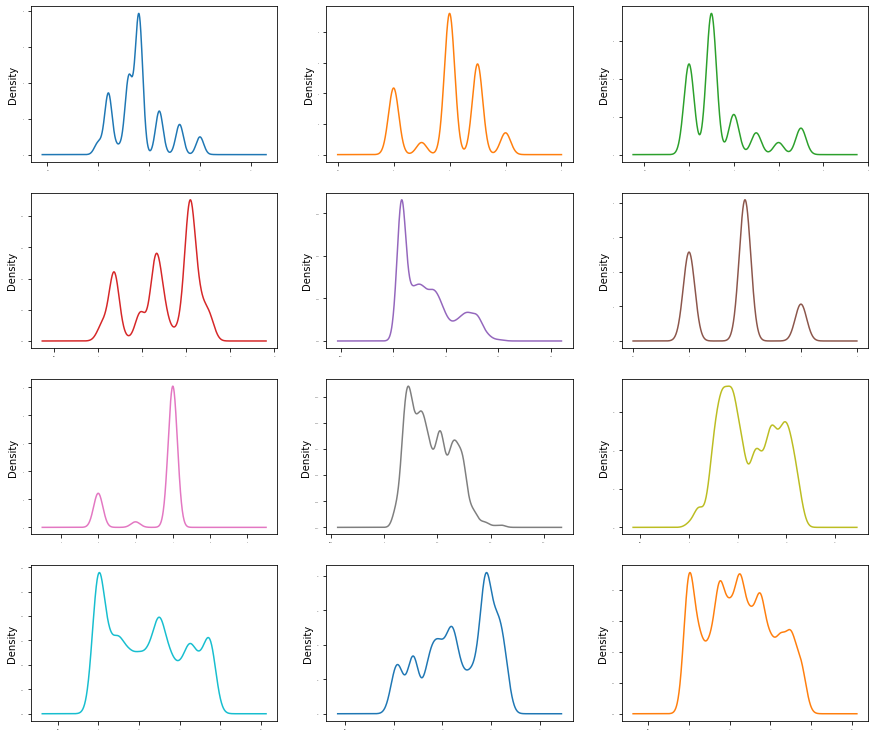

In [49]:
df_new.plot(kind='density',subplots=True,  layout=(6,3), sharex=False, legend=False, fontsize=1, figsize=(15,20))
plt.show()

In [50]:
df_new.skew()

Airline            0.730109
Source            -0.438959
Destination        1.266475
Route             -0.507356
Duration           0.779912
Total_Stops        0.230633
Additional_Info   -1.468582
Price              0.415788
Dep_hour           0.100897
Dep_minute         0.172815
Arrival_hour      -0.362237
Arrival_minute     0.106995
dtype: float64

In [51]:
dfa=power_transform(df_new)

dfa=pd.DataFrame(dfa,columns=df_new.columns)

As we can observe that their is some skewness present in the dataset, So we remove that skewness.


In [52]:
#splitting the dataset into independent and target variables in x and y respectively

x=dfa.drop('Price', axis=1)
y=dfa['Price']

In [53]:
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,-0.306474,-1.613842,1.779780,-1.553664,-1.049739,-1.286791,0.523731,1.543970,0.026332,-1.789784,-0.772611
1,-1.429515,0.894566,-1.363750,0.219251,-0.038937,1.640431,0.523731,-1.367341,1.184076,-0.049454,-0.429902
2,0.137017,-0.028430,0.021816,1.207673,1.072462,1.640431,0.523731,-0.561453,0.259437,-1.358383,0.158165
3,-0.306474,0.894566,-1.363750,0.419764,-0.382439,0.381928,0.523731,0.949269,-0.932297,1.416939,0.421280
4,-0.306474,-1.613842,1.779780,-1.279278,-0.522082,0.381928,0.523731,0.637442,1.184076,1.122982,0.669846
...,...,...,...,...,...,...,...,...,...,...,...
10470,-2.249343,0.894566,-1.363750,-0.343431,-1.172473,-1.286791,0.523731,1.101323,1.339222,1.269924,0.158165
10471,-1.429515,0.894566,-1.363750,-0.343431,-1.140508,-1.286791,0.523731,1.251031,1.021223,1.416939,-0.123455
10472,0.137017,-1.613842,0.727547,-1.553664,-0.993039,-1.286791,0.523731,-0.751647,0.026332,-0.341500,-0.123455
10473,2.118278,-1.613842,1.779780,-1.553664,-1.109431,-1.286791,0.523731,-0.197883,0.471280,0.096753,-0.772611


In [54]:
y

0       -1.353658
1       -0.150924
2        1.189166
3       -0.555382
4        1.082693
           ...   
10470   -1.270786
10471   -1.256075
10472   -0.266787
10473    0.959088
10474    0.783270
Name: Price, Length: 10475, dtype: float64

In [55]:
#checking the best random state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.5855754129720325
At random state 0, the testing accuracy is:- 0.5773274596170248


At random state 1, the training accuracy is:- 0.5875701799217345
At random state 1, the testing accuracy is:- 0.5691328253240406


At random state 2, the training accuracy is:- 0.5851265118720863
At random state 2, the testing accuracy is:- 0.5792536488378883


At random state 3, the training accuracy is:- 0.5841688776292893
At random state 3, the testing accuracy is:- 0.5830188672234276


At random state 4, the training accuracy is:- 0.5829304264044424
At random state 4, the testing accuracy is:- 0.5878908659022319


At random state 5, the training accuracy is:- 0.5830236502441375
At random state 5, the testing accuracy is:- 0.5875808511324154


At random state 6, the training accuracy is:- 0.5867839042788427
At random state 6, the testing accuracy is:- 0.5725868344787326


At random state 7, the training accuracy is:- 0.5817792182297956
At random state 7,

At random state 63, the training accuracy is:- 0.585782789926642
At random state 63, the testing accuracy is:- 0.5762789163384874


At random state 64, the training accuracy is:- 0.5820112034262387
At random state 64, the testing accuracy is:- 0.5918422186999939


At random state 65, the training accuracy is:- 0.5810580911376053
At random state 65, the testing accuracy is:- 0.595681342468309


At random state 66, the training accuracy is:- 0.5779075170560037
At random state 66, the testing accuracy is:- 0.6062049352855985


At random state 67, the training accuracy is:- 0.5803527576672802
At random state 67, the testing accuracy is:- 0.5969274398646462


At random state 68, the training accuracy is:- 0.583914551050437
At random state 68, the testing accuracy is:- 0.5842066158141216


At random state 69, the training accuracy is:- 0.5832012999746263
At random state 69, the testing accuracy is:- 0.5869498515223219


At random state 70, the training accuracy is:- 0.5848603656215317
At ran

At random state 131, the training accuracy is:- 0.5831151732205939
At random state 131, the testing accuracy is:- 0.5871966149370462


At random state 132, the training accuracy is:- 0.584552633699392
At random state 132, the testing accuracy is:- 0.5801678402056497


At random state 133, the training accuracy is:- 0.5826445381100631
At random state 133, the testing accuracy is:- 0.5892754663508666


At random state 134, the training accuracy is:- 0.584509762170304
At random state 134, the testing accuracy is:- 0.5816970490468609


At random state 135, the training accuracy is:- 0.5836392485917195
At random state 135, the testing accuracy is:- 0.5847761422859521


At random state 136, the training accuracy is:- 0.5854599379867065
At random state 136, the testing accuracy is:- 0.5777070249215772


At random state 137, the training accuracy is:- 0.580301438977238
At random state 137, the testing accuracy is:- 0.5986509453137596


At random state 138, the training accuracy is:- 0.58461101

At random state 197, the training accuracy is:- 0.5825147583418464
At random state 197, the testing accuracy is:- 0.5894876563884357


At random state 198, the training accuracy is:- 0.579607883694695
At random state 198, the testing accuracy is:- 0.5994776037031053


At random state 199, the training accuracy is:- 0.5835861139273516
At random state 199, the testing accuracy is:- 0.5853434539871294




--->From the above stats we can see that at random state 129, the testing accuracy and the training accuracy is highest.


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=129)

In [57]:
model=[LinearRegression(),SVR(),RandomForestRegressor(),DecisionTreeRegressor()]

In [58]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('r2_score of',n,'is')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

r2_score of LinearRegression() is
0.6132526686684936
0.3960326310329552
0.5132557710606721


r2_score of SVR() is
0.8135200202859322
0.19095712114385835
0.30065065337032026


r2_score of RandomForestRegressor() is
0.8630399387087383
0.14024829397754773
0.24564067680827176


r2_score of DecisionTreeRegressor() is
0.8510392122042415
0.15253714229492357
0.24871782440524864




Now checking the Cross Validation Score to check whether our models are overfitted or underfitted


In [59]:
scrli=cross_val_score(LinearRegression(),x,y,cv=5)
print('cross validation score of linear regression: ',scrli.mean())

cross validation score of linear regression:  0.5824830857855774


In [60]:
scrrf=cross_val_score(RandomForestRegressor(),x,y, cv=5)
print('cross validation score of RandomForestregression: ',scrrf.mean())

cross validation score of RandomForestregression:  0.8284058019977124


In [61]:
scrdtr=cross_val_score(DecisionTreeRegressor(),x,y, cv=5)
print('cross validation score of DecisionTreeregression: ',scrdtr.mean())

cross validation score of DecisionTreeregression:  0.8077764177169326


In [62]:
scrsvr=cross_val_score(SVR(),x,y, cv=5)
print('cross validation score of SVR: ',scrsvr.mean())

cross validation score of SVR:  0.7747171686196391


In [63]:

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],}

In [64]:
GCV=GridSearchCV(RandomForestRegressor(), param_grid,  cv = 5,)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [66]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 11}

In [67]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [68]:
r2_score(y_test,GCV_pred,)

0.8581530399826348

In [69]:
joblib.dump(GCV.best_estimator_,'Flightprice.obj')

['Flightprice.obj']

# Using the test Dataset


In [70]:
#loading the test data
test_df=pd.read_csv('FlightTest_set.csv')

In [71]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [72]:
#checking the data dimension
test_df.shape

(2671, 10)

In [73]:
#checking the null values in the dataset
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Doing the feature Engineering on the test data


In [74]:
test_df["Additional_Info"] = test_df["Additional_Info"].replace({'No Info': 'No info'})

In [75]:
test_df['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [76]:
test_df['Duration']=  test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [77]:
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_minute"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [78]:
test_df["Arrival_hour"] = pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df["Arrival_minute"] = pd.to_datetime(test_df['Arrival_Time']).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [79]:
enc=OrdinalEncoder()

for i in test_df.columns:
    if test_df[i].dtypes=='object':
        test_df[i]=enc.fit_transform(test_df[i].values.reshape(-1,1))

In [80]:
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [81]:
test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,4.0,2.0,1.0,76.0,655,1,5.0,17,30,4,25
1,3.0,3.0,0.0,65.0,240,1,5.0,6,20,10,20
2,4.0,2.0,1.0,76.0,1425,1,3.0,19,15,19,0
3,6.0,2.0,1.0,76.0,780,1,5.0,8,0,21,0
4,0.0,0.0,2.0,16.0,170,0,5.0,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,51.0,1435,1,5.0,20,30,20,25
2667,3.0,3.0,0.0,43.0,155,0,5.0,14,20,16,55
2668,4.0,2.0,1.0,76.0,395,1,5.0,21,50,4,25
2669,1.0,2.0,1.0,76.0,915,1,5.0,4,0,19,15


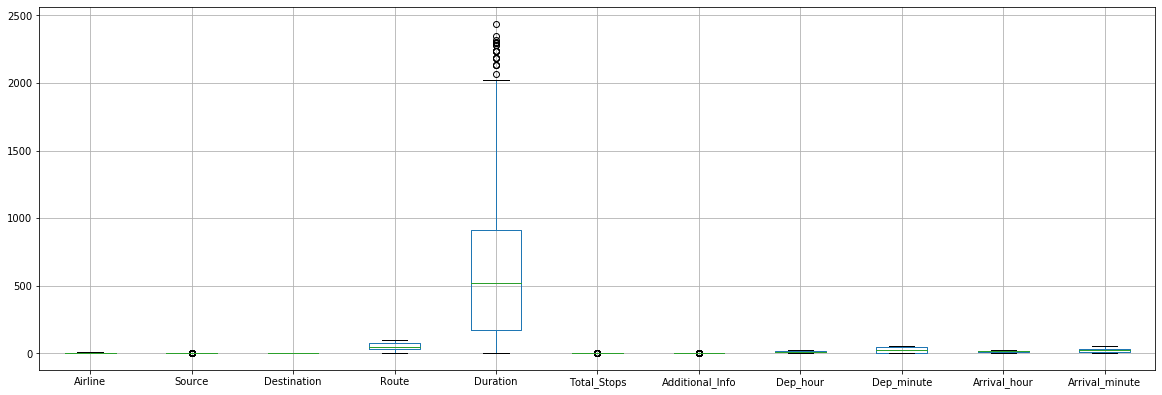

In [82]:
#checking the outliers
test_df.iloc[:,0:14].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [83]:
#checking the zscore of the dataset to remove the outliers
z=np.abs(zscore(test_df))
z

array([[0.01190758, 0.03256662, 0.29488167, ..., 0.26770357, 1.36170869,
        0.02633999],
       [0.42377921, 0.87708559, 0.97622158, ..., 0.25632445, 0.50932437,
        0.27177067],
       [0.01190758, 0.03256662, 0.29488167, ..., 0.51833847, 0.76925212,
        1.46421332],
       ...,
       [0.01190758, 0.03256662, 0.29488167, ..., 1.31575963, 1.36170869,
        0.02633999],
       [1.29515278, 0.03256662, 0.29488167, ..., 1.30438051, 0.76925212,
        0.56988133],
       [0.88328115, 0.03256662, 0.29488167, ..., 1.57777364, 0.76925212,
        0.56988133]])

In [84]:
threshold=3
print(np.where(z>3))

(array([  72,  251,  251,  484,  510,  673,  725,  786,  875,  877,  954,
       1022, 1271, 1279, 1379, 1511, 1554, 1686, 1689, 1689, 1781, 1802,
       1861, 1918, 1945, 2021, 2114, 2359, 2422, 2442, 2472, 2487, 2492],
      dtype=int64), array([5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 6, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 6,
       6, 4, 4, 5, 4, 4, 5, 5, 4, 5, 4], dtype=int64))


In [85]:
test_df_new=test_df[(z<3).all(axis=1)]  # removing outliers

As we see there are outliers in the data, So we remove the outliers.


In [86]:
#checking the skewness in the dataset
test_df_new.skew()

Airline            0.479224
Source            -0.425340
Destination        1.261535
Route             -0.276337
Duration           0.813446
Total_Stops        0.205464
Additional_Info   -1.649280
Dep_hour           0.076690
Dep_minute         0.135106
Arrival_hour      -0.433066
Arrival_minute     0.112039
dtype: float64

In [87]:
test_df_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,4.0,2.0,1.0,76.0,655,1,5.0,17,30,4,25
1,3.0,3.0,0.0,65.0,240,1,5.0,6,20,10,20
2,4.0,2.0,1.0,76.0,1425,1,3.0,19,15,19,0
3,6.0,2.0,1.0,76.0,780,1,5.0,8,0,21,0
4,0.0,0.0,2.0,16.0,170,0,5.0,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,51.0,1435,1,5.0,20,30,20,25
2667,3.0,3.0,0.0,43.0,155,0,5.0,14,20,16,55
2668,4.0,2.0,1.0,76.0,395,1,5.0,21,50,4,25
2669,1.0,2.0,1.0,76.0,915,1,5.0,4,0,19,15


In [88]:
#loading the model
model=joblib.load('Flightprice.obj')

In [89]:
model

RandomForestRegressor(max_depth=10, n_estimators=11)

In [90]:
predictions=model.predict(test_df_new)

In [91]:
pd.set_option('display.max_columns', None)

In [92]:
predictions

array([0.24441721, 0.24441721, 0.21442601, ..., 0.24441721, 0.55809683,
       0.24441721])

In [93]:
prediction=pd.DataFrame(predictions,columns=['prediction'])

In [94]:
prediction

,prediction
0,0.244417
1,0.244417
2,0.214426
3,-0.067172
4,1.808042
...,...
2635,0.790490
2636,0.244417
2637,0.244417
2638,0.558097


# Case Study:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

we have to build a machine learning model to predict the price of the flight ticket.

# Findings:

'Jet Airways' is used by the passengers mostly.

majority of the flights have source 'Delhi'.

majority of the flights are going to 'cochin'.

majority of the flights have 1 stop in their route.

from 'Delhi' and 'Kolkata' majority of the flight has 1 stop in their route.

from 'Delhi' the highest price flight is taking off.

majority of the tickets price are range from 3000 to 8000.

from 'Delhi','Kolkata' and 'Banglore', the majority of the flights are of 'Jet Airways'.

'Jet Airways Business' are having the highest ticket price.

'Total_Stops' and 'Duration' column is most positively related to the price.

# Predictions:

At random state 129, the testing accuracy and the training accuracy is highest.

The best r2_score is for RandomForest Regressor.

Minimum difference in r2_score and cross validation score is for RandomForest Rgressor. So it is our best model.

After doing hyperparameter tuning. we increase the score of our model from 83% to 86%.